<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝: 지도학습

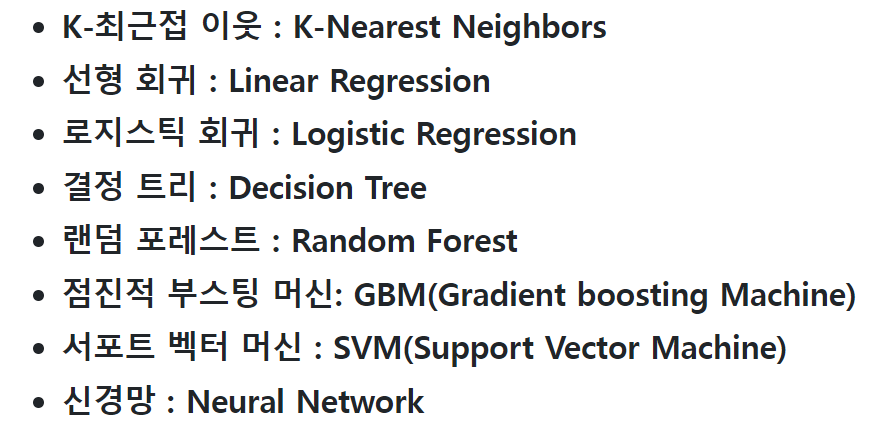

# 나이브 베이즈 모델
* 통계기반 지도학습 
* 각 확률을 독립적이라고 가정한다.

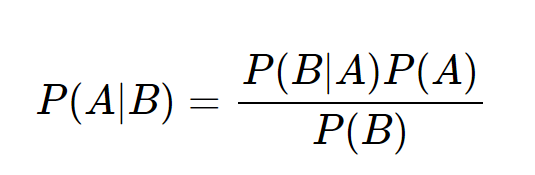


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
# 데이터로드

newsdata=fetch_20newsgroups(subset='train')
print(newsdata.keys())

In [ ]:
print (len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


In [ ]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# 첫번째 데이터 라벨 및 내용 확인 
print(newsdata.target[0])

7


In [ ]:
print(newsdata.target_names[7])

rec.autos


In [ ]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
# 토큰화 
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape)

(11314, 130107)


In [ ]:
# TF-IDF행렬 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [ ]:
# 나이브베이즈 학습습
mod = MultinomialNB()
mod.fit(tfidfv, newsdata.target)

MultinomialNB()

In [ ]:
# 라플라스 스무딩 처리 ; 기존에 없던 단어가 들어오면 확률이 0이 되므로, +1 해주는 방법
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [ ]:
# 테스트데이터 준비 및 
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #테스트 데이터 갖고오기
X_test_dtm = dtmvector.transform(newsdata_test.data) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM(documetn term maxtrix)을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(newsdata_test.target, predicted)) #예측값과 실제값 비교

정확도: 0.7738980350504514
